In [27]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### 导入数据

In [4]:
data = load_digits()
X = data.data
Y = data.target

### 绘制图像

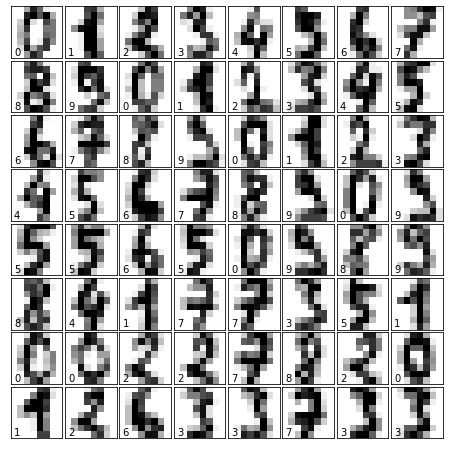

In [11]:
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, top=1, bottom=0, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(data.images[i], cmap=plt.cm.binary, interpolation='nearest')
    ax.text(0, 7, str(data.target[i]))

### 切分数据并建模

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,y_train)
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

0.9976133651551312
0.9425925925925925


E:\Anaconda\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### 网格搜索调参

In [37]:
d = {
    'max_depth':range(1,3),
    'n_estimators':range(20, 1000, 10),
}
rfc = RandomForestClassifier(random_state=0)
grid = GridSearchCV(rfc, param_grid=d, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

E:\Anaconda\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 196 candidates, totalling 588 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 588 out of 588 | elapsed:  3.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid=

In [39]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.score(X_test, y_test))

0.8305489260143198
{'max_depth': 2, 'n_estimators': 400}
0.7851851851851852


In [46]:
rfc = RandomForestClassifier(n_estimators=400, random_state=0).fit(X_train, y_train)
y_pred = rfc.predict(X_test)
rfc.score(X_test, y_test)

0.9777777777777777

### 生成分类报告

In [47]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        45
           1       0.96      0.98      0.97        52
           2       1.00      0.96      0.98        53
           3       0.96      0.98      0.97        54
           4       1.00      0.98      0.99        48
           5       0.96      0.96      0.96        57
           6       0.98      1.00      0.99        60
           7       0.96      1.00      0.98        53
           8       0.98      0.93      0.96        61
           9       0.98      0.98      0.98        57

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [48]:
mat = confusion_matrix(y_test, y_pred)
mat

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 51,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1,  1, 51,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 47,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  1,  0,  2,  0,  0,  0,  1, 57,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 56]], dtype=int64)

Text(69.0, 0.5, 'true label')

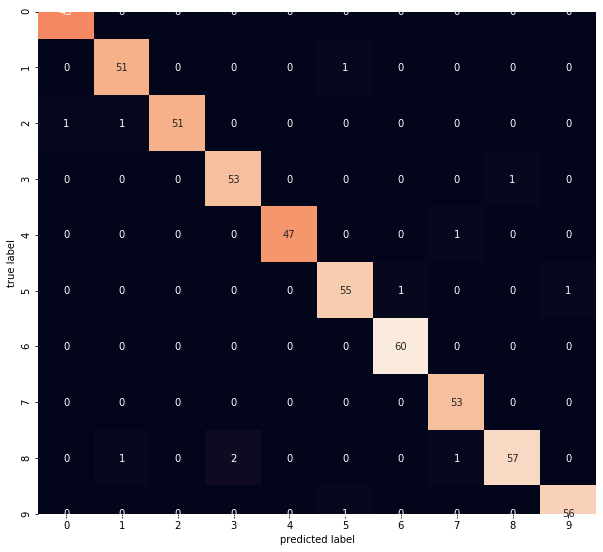

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('predicted label')
plt.ylabel('true label')

### 图像显示问题: seaborn版本问题